In [41]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload

%autoreload 2
from implementations import *



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
%cd drive/My Drive/ML/ML2020/source

[Errno 2] No such file or directory: 'drive/My Drive/ML/ML2020/source'
/content/drive/My Drive/ML/ML2020/source


# Load the data and clean the data

In [42]:
from proj1_helpers import *
path = '../data/train.csv'
y, tx,ids = load_csv_data(path)


In [ ]:
degree = 1
method = 'mean'
tx = pre_process(tx,method,degree)
if True in np.isnan(tx):
    print('fail')
tx.shape

(250000, 23)

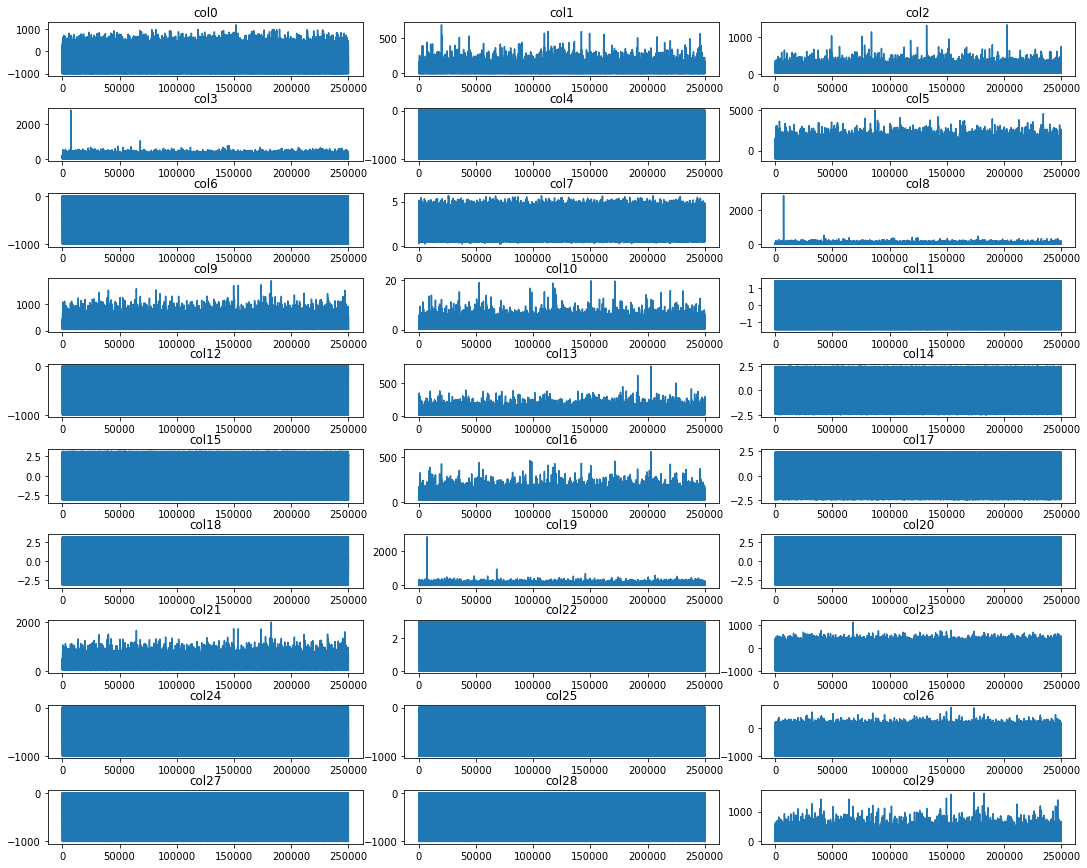

In [ ]:
fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(15, 12))
cols = np.linspace(0,30,31,dtype=int)
fig.tight_layout()
for ax, col in zip(axs.flat, cols):
    ax.plot(tx[:,col])
    ax.title.set_text('col{}'.format(col))

By looking at this graph, we can see that some columns have some outliers. I think that we could delete them to increase a bit the models. In addition, column [4,6,12,24,25,27,28] can be removed because there are full of -999 (maybe not).

In [ ]:
degree = 1
method = 'mean'
tx = pre_process(tx,method,degree)
if True in np.isnan(tx):
    print('fail')
tx.shape

(250000, 47)

# Grid search

In [ ]:
# initialisation
y, tx,ids = load_csv_data(path)
lambdas = [100,25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01,0.001,0.0001,0.00001,0.000001]
degrees = np.linspace(1,16,16,dtype='int')
gammas = [1e-6]
ratio = 0.8
method = 'mean'

# grid_search() return a list best_model = [best_lambda,best_degree,best_acc] where best_lambda is best gamma for GD and SGD

## Least-square

In [ ]:
best_model = grid_search(lambdas,ratio,degrees,gammas,method,tx,y,'ls')

[100, 4, 0.7993]


## Logistic regression


In [ ]:
grid_search(lambdas,ratio,degrees,gammas,method,tx,y,'logistic')

[1e-06, 8, 0.6685]


[1e-06, 8, 0.6685]

## Regularized logistic regression

In [ ]:
grid_search(lambdas,ratio,degrees,gammas,method,tx,y,'reg_logistic')

## Least-square GD

In [ ]:
# Will take a lot of time to compute
grid_search(lambdas,ratio,degrees,gammas,method,tx,y,'lsGD')

## Least-square SGD

In [ ]:
# Will take a lot of time to compute
grid_search(lambdas,ratio,degrees,gammas,method,tx,y,'lsSGD')

## Ridge

In [ ]:
best_model = grid_search(lambdas,ratio,degrees,gammas,method,tx,y,'ridge')
#cross_validation(y, tx, 5, 0.0001, 6, seed=1, method="ridge")
#tx_opt = pre_process(tx,method,best_model[1])
#w_ridge,loss_ridge = ridge_regression(y,tx_opt,best_model[0])

[1e-06, 4, 0.7996]


# Train the best Model

In [ ]:
tx_opt = pre_process(tx,method,7)
w_ridge,loss_ridge = ridge_regression(y,tx_opt,0.0001)
################# Current best 0.821 ########################

## Logistic regression


In [ ]:
best_model = grid_search(lambdas,ratio,[1,2,3,4],gammas,method,tx,y,'logistic')

D:\OneDrive\Documents\EPFL\Master_3\Machine Learning\ML2020\source\implementations.py:82: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-x))


## Least-square GD

In [ ]:
degrees = [1]

In [ ]:
# Will take a lot of time to compute
best_model = grid_search(lambdas,ratio,degrees,gammas,method,tx,y,'lsGD',True)
tx_opt = pre_process(tx,method,best_model[1])
max_iters = 10000
initial_w = np.zeros(tx_opt.shape[1])
w_lsGD,loss_lsGD = least_squares_GD(y,tx_opt, initial_w, max_iters,best_model[0])

degree = 1, gamma = 0.001
acc = 0.64224
####################################
degree = 1, gamma = 0.01
acc = 0.61888
####################################
degree = 1, gamma = 0.1
acc = 0.68596
####################################
-----------------------------------------
degree= 1 ,acc = 0.68596
-----------------------------------------
[0.1, 1, 0.68596]


## Least-square SGD

In [ ]:
# Will take a lot of time to compute
gammas = [0.0001,0.001,0.01,0.1]
best_model = grid_search(lambdas,ratio,degrees,gammas,method,tx,y,'lsSGD',True)
tx_opt = pre_process(tx,method,best_model[1])
max_iters = 10000
initial_w = np.zeros(tx_opt.shape[1])
w_lsSGD,loss_lsSGD = least_squares_SGD(y,tx_opt, initial_w, max_iters,best_model[0])

degree = 1, gamma = 0.0001
acc = 0.61872
####################################
degree = 1, gamma = 0.001
acc = 0.68404
####################################
degree = 1, gamma = 0.01
acc = 0.73028
####################################
degree = 1, gamma = 0.1
acc = 0.73236
####################################
-----------------------------------------
degree= 1 ,acc = 0.73236
-----------------------------------------
[0.1, 1, 0.73236]


# CROSS CORR-RIDGE-NORMAL EQ

In [ ]:
    from proj1_helpers import *
    from implementations import *
    
    k_fold = 5
    seed = 7

    Features = ['true','false']
    Lambdas = np.logspace(-18, -1, 30)
    Degrees = np.arange(1,10)
    
    for cross in Features:
        for log in Features:
            Min_loss_Degrees=[]
            Lambda_min=[]
            Min_var=[]
            for degree in Degrees:
                # define lists to store the loss of training data and test data
                Loss_tr = []
                Loss_te = []
                Var_tr= []
                Var_te= []
                min_loss = 1e10
                lambda_min = 0
                min_var = 0

                for lambda_ in Lambdas:
        
                    loss_tr,loss_te, var_tr,var_te=cross_validation(y,tx,k_fold,lambda_, degree,seed,'ridge',cross,log)
                    
                    Loss_tr += [loss_tr] 
                    Loss_te += [loss_te]  
                    Var_tr += [var_tr]
                    Var_te += [var_te]
                    
                    if loss_te < min_loss:
                        lamda_min = lambda_
                        min_var=var_te
                        min_loss = loss_te
                
                Lambda_min += [lambda_min]
                Min_loss_Degrees += [min_loss]
                Min_var += [min_var]
                
                
                # Plot the obtained results
                plt.figure(3)
                cross_validation_visualization(Lambdas,Loss_tr,Loss_te,Var_tr,Var_te)
                title = 'cross validation, degree= ' +str(degree)
                if log == 'true':
                    title += ', log terms'
                if cross == 'true':
                    title += ', cross terms'
                plt.title(title)
                plt.show()
                plt.savefig(title)

            labl='poly'   
            if log == 'true':
                labl += ' +log terms'
            
            if cross == 'true':
                labl += ' +cross terms'

            plt.figure(1)
            plt.errorbar(Degrees, Min_loss_Degrees,Min_var, marker='o', label=labl)
            
            global_min = min(Min_loss_Degrees)
            
            global_min_index = Min_loss_Degrees.index(global_min)
            min_degree = Degrees[global_min_index]
            global_lambda_min = Lambda_min[global_min_index]
            min_var= Min_var[global_min_index]

            feature = 'polynomial'
            if log == 'true':
                feature += ' + log'
            if cross == 'true':
                feature += '+ cross'
            
            f = open("best_methods.txt","a") #append mode 

            f.write('for ' + feature + ':' + '\n')
            f.write('         min_degree = '+ str(min_degree) + 'min_loss = ' + str(global_min) + 'min_std = ' + str(min_var) + 'lambda_min = ' + str(global_lambda_min))
            f.write('\n \n')
            
            f.close()
            
       

    plt.xlabel("polynomial degree")
    plt.ylabel("loss & std")
    plt.legend(loc='best') 
    plt.show()
    plt.savefig('best features for ridge regression')


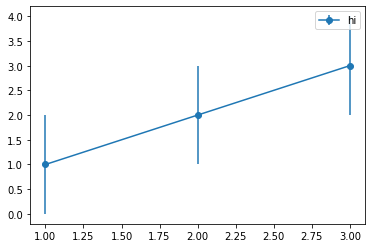

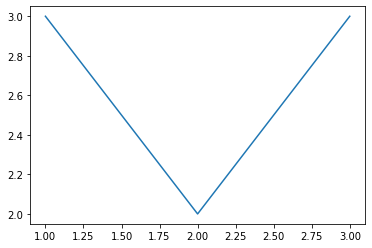

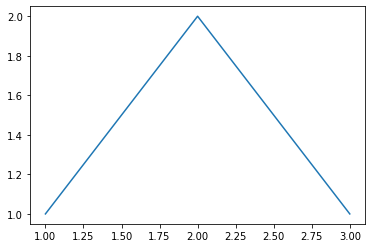

In [ ]:

import matplotlib.pyplot as plt
plt.figure(3)
plt.errorbar([1,2,3],[1,2,3],[1,1,1],marker='o', label='hi')
plt.legend(loc='best')
plt.show()

plt.figure(3)

plt.plot([1,2,3],[3,2,3])
plt.show()


plt.figure(1)
plt.plot([1,2,3],[1,2,1])
plt.show()

## Generate predictions and save ouput in csv format for submission:

In [ ]:
degree = 7
method = 'mean'
tx = pre_process(tx,method,degree)
if True in np.isnan(tx):
    print('fail')
tx.shape

(250000, 23)

In [ ]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
y_test, tx_test, ids_test = load_csv_data(DATA_TEST_PATH)
# Have to apply the same data cleaning as for train set
tx_test = pre_process(tx_test,'mean',7)

In [ ]:
tx_test.shape

(568238, 450)

In [ ]:
w_ridge=ridge_regression(y_test,tx_test,1e-16)

In [ ]:
w_ridge

In [ ]:
OUTPUT_PATH = '../data/result.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w_ridge, tx_test) # choose the weight here
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

ValueError: ignored